##ASSIGNMENT 4
#PART - A

In [4]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

#https://images.app.goo.gl/s4mwKkXPq6h1KKay8
#https://images.app.goo.gl/v17EFAyjC84FqmAG8

#Download the images from the above links and then apply the convolution filters(manually)
#a) apply HIGHPASS filter
#b) apply SHARPEN filter
#then output the resulting image

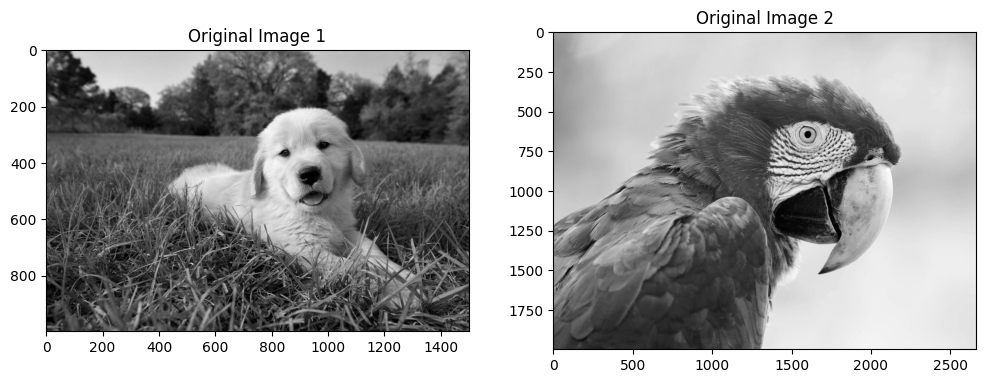

In [5]:
image1 = cv2.imread('/content/dog.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/bird.webp', cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image 1')

plt.subplot(1, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Original Image 2')
plt.show()


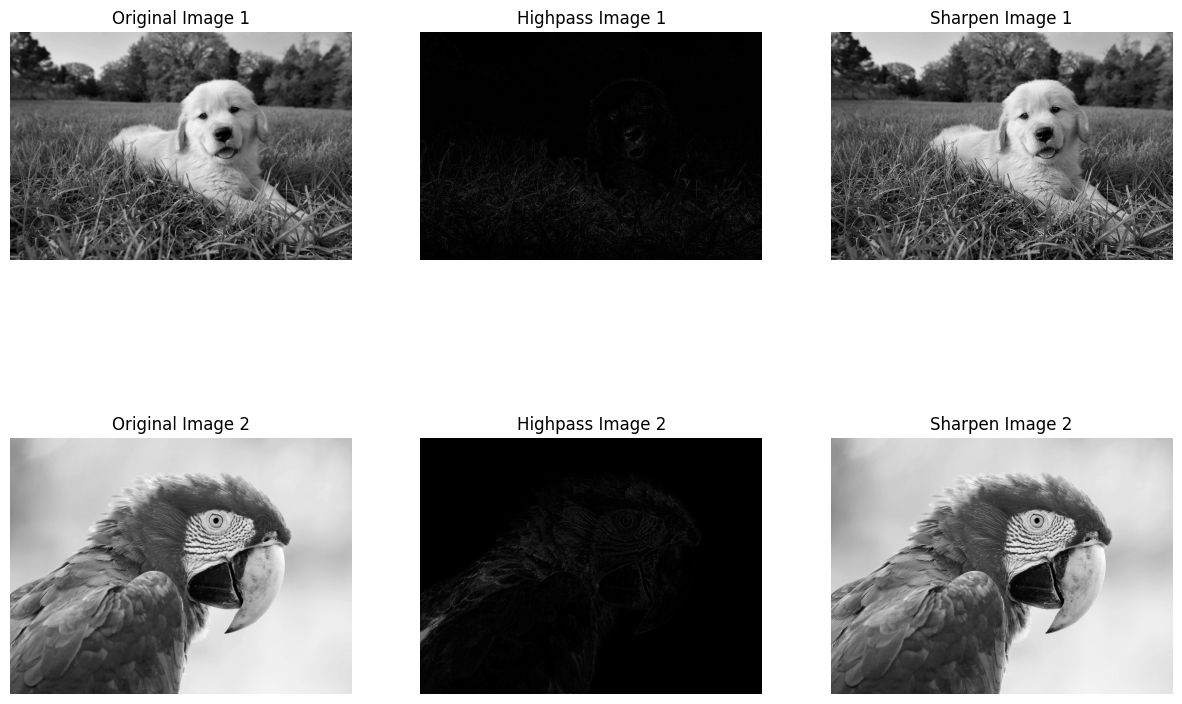

In [8]:
highpass_filter = np.array([[0, -1, 0],
                            [-1, 4, -1],
                            [0, -1, 0]])

sharpen_filter = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
highpass_image1 = cv2.filter2D(image1, -1, highpass_filter)
highpass_image2 = cv2.filter2D(image2, -1, highpass_filter)

sharpen_image1 = cv2.filter2D(image1, -1, sharpen_filter)
sharpen_image2 = cv2.filter2D(image2, -1, sharpen_filter)

images = [image1, highpass_image1, sharpen_image1, image2, highpass_image2, sharpen_image2]
titles = ['Original Image 1', 'Highpass Image 1', 'Sharpen Image 1',
          'Original Image 2', 'Highpass Image 2', 'Sharpen Image 2']

plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)



### 3.1 - Zero-Padding

Zero-padding adds zeros around the border of an image:


In [ ]:
#Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K.


In [19]:
def corr2d(X: np.array, K: np.array) -> np.array:
  h, w = K.shape
  Y = np.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
  for i in range(Y.shape[0]):
      for j in range(Y.shape[1]):
          Y[i, j] = np.sum(X[i:i + h, j:j + w] * K)
  return Y

In [20]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [22]:
K = np.array([[1.0, -1.0]], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K)
print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [26]:
X = X.reshape(1, 6, 8, 1)  # Adding batch and channel dimensions
Y = Y.reshape(1, 6, 7, 1)  # Adding batch and channel dimensions # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

In [27]:
#use the above corr2d in model

class model:
    def __init__(self,lr,epochs):
      self.lr = lr
      self.epochs = epochs
      self.kernel = np.random.randn(1, 2).astype(np.float32)
    def fit(self,X,Y):
      for epoch in range(self.epochs):

          Y_pred = corr2d(X[0, :, :, 0], self.kernel)
          # Compute mean squared error
          loss = np.mean((Y[0, :, :, 0] - Y_pred) ** 2)

          # Compute gradients
          grad = np.zeros_like(self.kernel)
          for i in range(self.kernel.shape[0]):
            for j in range(self.kernel.shape[1]):
              self.kernel[i, j] += 1e-5
              Y_pred_new = corr2d(X[0, :, :, 0], self.kernel)
              loss_new = np.mean((Y[0, :, :, 0] - Y_pred_new) ** 2)
              grad[i, j] = (loss_new - loss) / 1e-5
              self.kernel[i, j] -= 1e-5

          # Update kernel
          self.kernel -= self.lr * grad

          print(f"Epoch {epoch + 1}, Loss: {loss:.4f}, Kernel: {self.kernel.flatten()}")



In [28]:
gd = model(3e-2,100)
gd.fit(X,Y)

Epoch 1, Loss: 0.7894, Kernel: [-0.26207435 -1.0633397 ]
Epoch 2, Loss: 0.7300, Kernel: [-0.22848977 -1.040044  ]
Epoch 3, Loss: 0.6756, Kernel: [-0.19618556 -1.0179245 ]
Epoch 4, Loss: 0.6256, Kernel: [-0.16509244 -0.9969292 ]
Epoch 5, Loss: 0.5797, Kernel: [-0.13515995 -0.9770083 ]
Epoch 6, Loss: 0.5376, Kernel: [-0.10656707 -0.95811415]
Epoch 7, Loss: 0.4990, Kernel: [-0.0790247  -0.94019735]
Epoch 8, Loss: 0.4636, Kernel: [-0.05228116 -0.9232147 ]
Epoch 9, Loss: 0.4309, Kernel: [-0.02661711 -0.90712833]
Epoch 10, Loss: 0.4009, Kernel: [-0.00178838 -0.8918968 ]
Epoch 11, Loss: 0.3732, Kernel: [ 0.02213933 -0.87748367]
Epoch 12, Loss: 0.3478, Kernel: [ 0.04520428 -0.8638524 ]
Epoch 13, Loss: 0.3244, Kernel: [ 0.06744006 -0.85096806]
Epoch 14, Loss: 0.3028, Kernel: [ 0.08880234 -0.8387972 ]
Epoch 15, Loss: 0.2830, Kernel: [ 0.10948595 -0.82730645]
Epoch 16, Loss: 0.2648, Kernel: [ 0.12944   -0.8164666]
Epoch 17, Loss: 0.2479, Kernel: [ 0.14869441 -0.8062484 ]
Epoch 18, Loss: 0.2324, K

In [29]:

def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image,
    as illustrated in Figure 1.

    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions

    Returns:
    X_pad -- padded image of shape (m, n_H + 2 * pad, n_W + 2 * pad, n_C)
    """

    # YOUR CODE STARTS HERE

    X_pad= np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant')
    # YOUR CODE ENDS HERE

    return X_pad

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


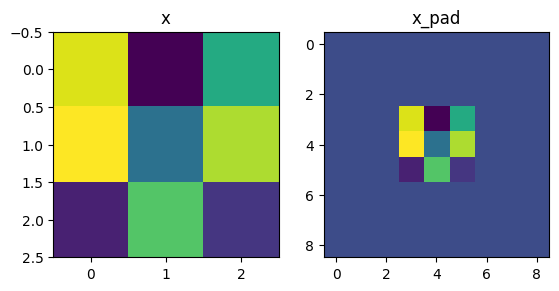

In [30]:

np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 3)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1, 1])
print ("x_pad[1,1] =\n", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])

In [34]:
def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation
    of the previous layer.

    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)

    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """
   # Element-wise product between a_slice_prev and W.
    s = np.multiply(a_slice_prev, W)

    # Sum over all entries of the volume s.
    Z = np.sum(s)

    # Add bias b to Z.
    Z = Z + float(b)

    return Z

In [35]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

assert (type(Z) == np.float64), "You must cast the output to numpy float 64"
assert np.isclose(Z, -6.999089450680221), "Wrong value"

Z = -6.999089450680221


<ipython-input-34-b8675667bccb>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z = Z + float(b)



### 3.3 - Convolutional Neural Networks - Forward Pass

In the forward pass, you will take many filters and convolve them on the input. Each 'convolution' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume:

### Exercise 3 -  conv_forward
Implement the function below to convolve the filters `W` on an input activation `A_prev`.  
This function takes the following inputs:
* `A_prev`, the activations output by the previous layer (for a batch of m inputs);
* Weights are denoted by `W`.  The filter window size is `f` by `f`.
* The bias vector is `b`, where each filter has its own (single) bias.

You also have access to the hyperparameters dictionary, which contains the stride and the padding.

In [37]:
a_slice_prev.shape

(4, 4, 3)

In [40]:

def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function

    Arguments:
    A_prev -- output activations of the previous layer,
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"

    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    """
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    # Retrieve dimensions from W's shape
    (f, f, n_C_prev, n_C) = W.shape

    # Retrieve information from "hparameters"
    stride = hparameters['stride']
    pad = hparameters['pad']

    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1

    Z = np.zeros((m, n_H, n_W, n_C))

    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)

    # Iterate over the batch of training examples
    for i in range(m):
        a_prev_pad = A_prev_pad[i, :, :, :]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f

                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]

                    Z[i, h, w, c] = np.sum(a_slice_prev * W[:, :, :, c]) + float(b[:, :, :, c])

    # Save information in "cache" for the backpropagation
    cache = (A_prev, W, b, hparameters)

    return Z, cache


    # YOUR CODE ENDS HERE

    return Z

In [41]:

np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
z_mean = np.mean(Z)
z_0_2_1 = Z[0, 2, 1]
cache_0_1_2_3 = cache_conv[0][1][2][3]
print("Z's mean =\n", z_mean)
print("Z[0,2,1] =\n", z_0_2_1)
print("cache_conv[0][1][2][3] =\n", cache_0_1_2_3)



Z's mean =
 0.5511276474566768
Z[0,2,1] =
 [-2.17796037  8.07171329 -0.5772704   3.36286738  4.48113645 -2.89198428
 10.99288867  3.03171932]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


<ipython-input-40-1f2a20e72c60>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i, h, w, c] = np.sum(a_slice_prev * W[:, :, :, c]) + float(b[:, :, :, c])



## 4 - Pooling Layer

These pooling layers have no parameters for backpropagation to train. However, they have hyperparameters such as the window size $f$. This specifies the height and width of the $f \times f$ window you would compute a *max* or *average* over.

<a name='4-1'></a>
### 4.1 - Forward Pooling
Now, you are going to implement MAX-POOL and AVG-POOL, in the same function.

<a name='ex-4'></a>
### Exercise 4 - pool_forward

Implement the forward pass of the pooling layer. Follow the hints in the comments below.





In [42]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer

    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")

    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    """
    # Retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    # Retrieve hyperparameters from "hparameters"
    stride = hparameters["stride"]
    f = hparameters["f"]

    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))

    # Implement the pooling operation
    for i in range(m):
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):

                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f

                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]

                    # Compute the pooling operation on the slice.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)

    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)

    return A, cache


    # YOUR CODE ENDS HERE

    return A

In [44]:
# Case 1: stride of 1
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A= pool_forward(A_prev, hparameters, mode = "max")
print("mode = max")
print("A.shape = " + str(A[0].shape))
print("A[1, 1] =\n", A[0][1, 1])
A= pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A[0].shape))
print("A[1, 1] =\n", A[0][1, 1])


mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]
mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]


**Expected output**

```
mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]

mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]
```

In [46]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride": 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape =", A.shape)
print("A[0] =\n", A[0])
print()

A, cache = pool_forward(A_prev, hparameters, mode="average")
print("mode = average")
print("A.shape =", A.shape)
print("A[1] =\n", A[1])


mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]


**Expected output**
```
mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]
  ```